<a href="https://colab.research.google.com/github/rewpak/AI-works/blob/main/Fuzzy_Systems_Tipping_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5. Fuzzy Systems
# Task 5.1 The Tipping Problem
## Problem Descriptions
The main problem is how much to tip at a restaurant based on both the service and food quality.

Firstly we have to formulate the problem:

* Food: poor, average, good (scale of 0-10)

* Service: poor, average, good (scale of 0-10)

* Tip: low, medium, high (range of 0-25%)

The memberships of the linguistic values are defined in the same way by three triangles as follows:
![picture](https://drive.google.com/uc?export=view&id=14qJswznQWD4wUiXB8GGVgKlG13mUaxvc)

We have three rules:
1.  IF the service was poor

  OR the food quality was poor

  THEN the tip will be low.

2. IF the service was average

   THEN the tip will be medium.

3.  IF the service was good

   OR the food quality was good

   THEN the tip will be high.
## Implementation and Results

In [ ]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894079 sha256=1e8bc1455510b27e22a8446881cca53c0c841cad6494d30f7706b452f2257e30
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
# New Antecedent/Consequent objects hold universe variables and membership functions
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Auto-membership function population is possible with .automf(3, 5, or 7)
food.automf(3)
service.automf(3)
tip.automf(3, names=['low', 'medium', 'high'])

# food.view()
# service.view()
# tip.view()

In [ ]:
# Define the rules
rule1 = ctrl.Rule(food['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | food['good'], tip['high'])

# Create the control system and its simulation
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

Suggested tip: 19.76409495548962 %


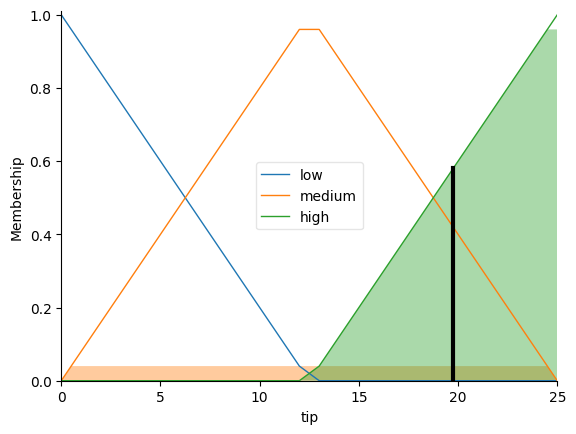

In [ ]:
# Pass inputs to the ControlSystem
tipping.inputs({'food': 6.5, 'service': 9.8})

# Crunch the numbers
tipping.compute()
print("Suggested tip:", tipping.output['tip'], "%")
tip.view(sim=tipping)


## Discussions

Based on a quality food rating of 6.5 out of 10 and a service rating of 9.8 out of 10, the suggested tip is 19.76%.
